# UNION DFs

In [161]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [162]:
df_final_web_data_1 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_1.txt')

In [163]:
df_final_web_data_1.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [164]:
df_final_web_data_1.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
dtype: int64

In [165]:
df_final_web_data_1.dropna(inplace=True)

In [166]:
df_final_web_data_1['Date/Time'] = pd.to_datetime(df_final_web_data_1['Date/Time'])

# Crear nuevas columnas para la fecha y la hora
df_final_web_data_1['Date'] = df_final_web_data_1['Date/Time'].dt.date
df_final_web_data_1['Time'] = df_final_web_data_1['Date/Time'].dt.time

In [167]:
df = df_final_web_data_1

# Convertir 'Date/Time' a tipo datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Ordenar por 'Client ID', 'Visitor ID', 'Visit ID' y 'Date/Time'
df.sort_values(by=['Client ID', 'Visitor ID', 'Visit ID', 'Date/Time'], inplace=True)

# Calcular la diferencia de tiempo entre pasos consecutivos
df['Time Diff'] = df.groupby(['Client ID', 'Visitor ID', 'Visit ID'])['Date/Time'].diff()

# Filtrar las diferencias de tiempo entre pasos del proceso
# En este caso, necesitamos las diferencias entre 'step_1', 'step_2', 'step_3', etc.
df_steps = df

# Mostrar resultados
df_steps[['Client ID', 'Visitor ID', 'Visit ID', 'Process Step', 'Date/Time', 'Date', 'Time', 'Time Diff']]

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,NaT
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,0 days 00:01:04
...,...,...,...,...,...,...,...,...
274435,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,2017-03-29,12:11:32,0 days 00:02:37
274434,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,2017-03-29,12:11:35,0 days 00:00:03
274433,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,2017-03-29,12:11:50,0 days 00:00:15
274432,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,2017-03-29,12:12:28,0 days 00:00:38


In [168]:
df_steps.isna().sum().dropna(inplace=True)

In [169]:
df_final_web_data_1.isna().sum()

Client ID           0
Visitor ID          0
Visit ID            0
Process Step        0
Date/Time           0
Date                0
Time                0
Time Diff       75646
dtype: int64

In [170]:
df_final_web_data_1.dropna(inplace=True)

In [171]:
df_final_web_data_2 = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_web_data_pt_2.txt')

In [172]:
df_final_web_data_2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [173]:
df_final_web_data_2.dropna(inplace=True)

In [174]:
df_final_web_data_2.rename(columns = {'client_id':'Client ID', 'visitor_id':'Visitor ID', 'visit_id':'Visit ID', 'process_step':'Process Step', 'date_time':'Date/Time'}, inplace=True)

In [175]:
df_final_web_data_2['Date/Time'] = pd.to_datetime(df_final_web_data_2['Date/Time'])

# Crear nuevas columnas para la fecha y la hora
df_final_web_data_2['Date'] = df_final_web_data_2['Date/Time'].dt.date
df_final_web_data_2['Time'] = df_final_web_data_2['Date/Time'].dt.time


In [176]:
df = df_final_web_data_2

# Convertir 'Date/Time' a tipo datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Ordenar por 'Client ID', 'Visitor ID', 'Visit ID' y 'Date/Time'
df.sort_values(by=['Client ID', 'Visitor ID', 'Visit ID', 'Date/Time'], inplace=True)

# Calcular la diferencia de tiempo entre pasos consecutivos
df['Time Diff'] = df.groupby(['Client ID', 'Visitor ID', 'Visit ID'])['Date/Time'].diff()

# Filtrar las diferencias de tiempo entre pasos del proceso
# En este caso, necesitamos las diferencias entre 'step_1', 'step_2', 'step_3', etc.
df_steps = df

# Mostrar resultados
df_steps[['Client ID', 'Visitor ID', 'Visit ID', 'Process Step', 'Date', 'Time', 'Time Diff']]

,Client ID,Visitor ID,Visit ID,Process Step,Date,Time,Time Diff
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01,07:26:55,NaT
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01,07:42:43,0 days 00:15:48
99716,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17,10:03:29,NaT
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17,10:03:39,0 days 00:00:10
99714,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17,10:03:52,0 days 00:00:13
...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01,22:44:58,0 days 00:03:11


In [177]:
df_final_web_data_2.isna().sum()

Client ID           0
Visitor ID          0
Visit ID            0
Process Step        0
Date/Time           0
Date                0
Time                0
Time Diff       83468
dtype: int64

In [178]:
df_final_web_data_2.dropna(inplace=True)

In [179]:
df_final_web_data_2.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
dtype: int64

In [180]:
df_final_web_data_2

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43,2017-06-01,07:42:43,0 days 00:15:48
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39,2017-06-17,10:03:39,0 days 00:00:10
99714,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17 10:03:52,2017-06-17,10:03:52,0 days 00:00:13
99713,546,475037402_89828530214,731811517_9330176838_94847,step_3,2017-06-17 10:05:19,2017-06-17,10:05:19,0 days 00:01:27
99712,546,475037402_89828530214,731811517_9330176838_94847,confirm,2017-06-17 10:05:42,2017-06-17,10:05:42,0 days 00:00:23
...,...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,0 days 00:03:11


In [181]:
dfjunto = pd.concat([df_final_web_data_1, df_final_web_data_2])

In [182]:
dfjunto

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,0 days 00:00:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,0 days 00:00:46
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,0 days 00:01:34
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,0 days 00:01:04
72017,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,0 days 00:00:07
...,...,...,...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,0 days 00:00:07
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,0 days 00:01:20
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,0 days 00:00:19
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,0 days 00:03:11


In [183]:
dfjunto.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
dtype: int64

In [184]:
df_final_exp_clients = pd.read_csv('/Users/Jaimecalderon/Desktop/IRONHACK/Proyectos/Proyecto 2/CSV/df_final_experiment_clients.txt')

In [185]:
df_final_exp_clients.isna().sum()
df_final_exp_clients.dropna(inplace=True)


In [186]:
df_final_exp_clients.rename(columns = {'client_id': 'Client ID'}, inplace = True)
df_final_exp_clients

,Client ID,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [187]:
df_merge = pd.merge(dfjunto, df_final_exp_clients, on='Client ID',how='inner')

In [188]:
df_merge.isna().sum()


Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
Variation       0
dtype: int64

In [189]:
df_merge.dropna(inplace=True)

In [190]:
df_merge.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
Variation       0
dtype: int64

In [191]:
df_merge

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
0,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,0 days 00:00:07,Test
1,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,0 days 00:00:32,Test
2,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,0 days 00:01:39,Test
3,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15,13:00:34,0 days 00:00:20,Test
4,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,0 days 00:00:07,Test
...,...,...,...,...,...,...,...,...,...
251856,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,2017-05-08,16:08:30,0 days 00:00:05,Test
251857,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,2017-05-08,16:08:40,0 days 00:00:10,Test
251858,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,2017-05-08,16:09:19,0 days 00:00:39,Test
251859,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,2017-05-08,16:09:40,0 days 00:00:21,Test


In [192]:
df_merge['Variation'].value_counts()

Variation
Test       140643
Control    111218
Name: count, dtype: int64

# Hasta aqui la union de los DF

# Separamos en df TEST y df CONTROL

In [193]:
df_test = df_merge[df_merge['Variation'] == 'Test']
df_control = df_merge[df_merge['Variation'] == 'Control']

In [274]:
df_control.nunique()

Client ID        21312
Visitor ID       23099
Visit ID         26897
Process Step         5
Date/Time       104857
Date                98
Time             51709
Time Diff         1449
Variation            1
dtype: int64

In [275]:
df_test.nunique()

Client ID        25495
Visitor ID       27335
Visit ID         31511
Process Step         5
Date/Time       131310
Date                98
Time             56599
Time Diff         1566
Variation            1
dtype: int64

In [194]:
df_test.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
Variation       0
dtype: int64

In [195]:
df_control.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
Variation       0
dtype: int64

In [288]:
df_control[df_control['Process Step'] == 'start'].shape[0]


16701

In [285]:
df_control[df_control['Process Step'] == 'confirm'].shape[0]

16741

In [196]:
df_control

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
11,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08,18:52:17,0 days 00:00:49,Control
12,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08,18:53:20,0 days 00:01:03,Control
13,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08,18:53:29,0 days 00:00:09,Control
14,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08,18:58:04,0 days 00:04:35,Control
15,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08,18:59:55,0 days 00:01:51,Control
...,...,...,...,...,...,...,...,...,...
251848,9997470,395791369_55562604618,761490147_96352537762_21814,start,2017-05-09 16:38:32,2017-05-09,16:38:32,0 days 00:34:15,Control
251849,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:38:34,2017-05-09,16:38:34,0 days 00:00:02,Control
251850,9997470,395791369_55562604618,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,2017-05-09,16:38:37,0 days 00:00:03,Control
251851,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,2017-05-09,16:39:16,0 days 00:00:39,Control


In [197]:
df_control['Process Step'].value_counts()

Process Step
step_1     29383
step_2     25772
step_3     22621
confirm    16741
start      16701
Name: count, dtype: int64

In [198]:
df_test.dropna(inplace=True)

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/3451913678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


In [199]:
df_test

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
0,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,0 days 00:00:07,Test
1,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,0 days 00:00:32,Test
2,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,0 days 00:01:39,Test
3,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15,13:00:34,0 days 00:00:20,Test
4,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,0 days 00:00:07,Test
...,...,...,...,...,...,...,...,...,...
251856,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,2017-05-08,16:08:30,0 days 00:00:05,Test
251857,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,2017-05-08,16:08:40,0 days 00:00:10,Test
251858,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,2017-05-08,16:09:19,0 days 00:00:39,Test
251859,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,2017-05-08,16:09:40,0 days 00:00:21,Test


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/3914372139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x='Process Step', order = unique_clients_per_step_test.index, palette="Set3")


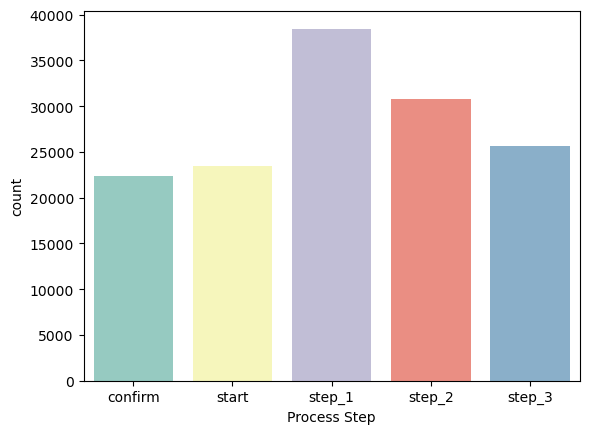

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_test = df_test.groupby('Process Step')['Client ID'].nunique()

# Crear el gráfico de barras
sns.countplot(data=df_test, x='Process Step', order = unique_clients_per_step_test.index, palette="Set3")

# Mostrar el gráfico
plt.show()


In [201]:
unique_clients_per_step_test 

Process Step
confirm    18498
start      11012
step_1     24132
step_2     22151
step_3     20667
Name: Client ID, dtype: int64

In [202]:
unique_clients_per_step_t

,Unique Client Count
Process Step,
confirm,18498
start,11012
step_1,24132
step_2,22151
step_3,20667


- Aqui podemos ver el numero total de veces q los clientes han estado en esos pasos. 

In [203]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients = df_test[df_test['Process Step'] == 'start']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count


5508

## Esto es el numero de clientes unicos en df_test. 5508 clientes unicos han pasado una vez por start lo q indica q hay 5508 clientes en start. 

In [204]:
# Verificar duplicados
duplicated_clients_t = df_test[df_test.duplicated(['Client ID', 'Process Step'], keep=False)]

# Mostrar duplicados
print("Duplicated Clients:")
duplicated_clients_t

Duplicated Clients:


,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
8,934,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:37:02,2017-04-18,02:37:02,0 days 00:00:32,Test
9,934,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:38:24,2017-04-18,02:38:24,0 days 00:01:22,Test
10,934,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:38:52,2017-04-18,02:38:52,0 days 00:00:28,Test
31,1516,182314299_63168583136,255400977_38039535960_779641,step_1,2017-04-06 22:15:20,2017-04-06,22:15:20,0 days 00:00:56,Test
32,1516,182314299_63168583136,255400977_38039535960_779641,step_2,2017-04-06 22:15:55,2017-04-06,22:15:55,0 days 00:00:35,Test
...,...,...,...,...,...,...,...,...,...
251831,9994115,434880129_22821511966,950367341_92559977720_135437,step_2,2017-05-08 10:36:00,2017-05-08,10:36:00,0 days 00:00:04,Test
251832,9994115,434880129_22821511966,950367341_92559977720_135437,step_3,2017-05-08 10:36:08,2017-05-08,10:36:08,0 days 00:00:08,Test
251833,9994115,434880129_22821511966,950367341_92559977720_135437,confirm,2017-05-08 10:36:32,2017-05-08,10:36:32,0 days 00:00:24,Test
251856,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,2017-05-08,16:08:30,0 days 00:00:05,Test


In [205]:
# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_test_d = duplicated_clients_t.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_t_d = unique_clients_per_step_test_d.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_t_d.columns = ['Process Step', 'Unique Client Count']
unique_clients_per_step_t_d

,Process Step,Unique Client Count
0,confirm,2489
1,start,5504
2,step_1,8349
3,step_2,5006
4,step_3,3131


## CONTROL

In [206]:
df_control

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
11,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08,18:52:17,0 days 00:00:49,Control
12,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08,18:53:20,0 days 00:01:03,Control
13,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08,18:53:29,0 days 00:00:09,Control
14,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08,18:58:04,0 days 00:04:35,Control
15,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08,18:59:55,0 days 00:01:51,Control
...,...,...,...,...,...,...,...,...,...
251848,9997470,395791369_55562604618,761490147_96352537762_21814,start,2017-05-09 16:38:32,2017-05-09,16:38:32,0 days 00:34:15,Control
251849,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:38:34,2017-05-09,16:38:34,0 days 00:00:02,Control
251850,9997470,395791369_55562604618,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,2017-05-09,16:38:37,0 days 00:00:03,Control
251851,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,2017-05-09,16:39:16,0 days 00:00:39,Control


In [207]:
df_control.isna().sum()

Client ID       0
Visitor ID      0
Visit ID        0
Process Step    0
Date/Time       0
Date            0
Time            0
Time Diff       0
Variation       0
dtype: int64

In [208]:
df_control.dropna(inplace=True)

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/2658584440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.dropna(inplace=True)


In [209]:
df_control

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
11,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08,18:52:17,0 days 00:00:49,Control
12,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08,18:53:20,0 days 00:01:03,Control
13,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08,18:53:29,0 days 00:00:09,Control
14,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08,18:58:04,0 days 00:04:35,Control
15,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08,18:59:55,0 days 00:01:51,Control
...,...,...,...,...,...,...,...,...,...
251848,9997470,395791369_55562604618,761490147_96352537762_21814,start,2017-05-09 16:38:32,2017-05-09,16:38:32,0 days 00:34:15,Control
251849,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:38:34,2017-05-09,16:38:34,0 days 00:00:02,Control
251850,9997470,395791369_55562604618,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,2017-05-09,16:38:37,0 days 00:00:03,Control
251851,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,2017-05-09,16:39:16,0 days 00:00:39,Control


- Todos los clientes q han pasado solo 1 vez por start. 

In [235]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients_c = df_control[df_control['Process Step'] == 'start']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients_c['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count_control = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count_control


4626

In [236]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients_c = df_control[df_control['Process Step'] == 'step_1']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients_c['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count_control = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count_control

14327

In [237]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients_c = df_control[df_control['Process Step'] == 'step_2']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients_c['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count_control = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count_control

13960

In [238]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients_c = df_control[df_control['Process Step'] == 'step_3']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients_c['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count_control = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count_control

13771

In [242]:
import pandas as pd

# Filtrar los clientes que han pasado por el paso 'start'
start_clients_c = df_control[df_control['Process Step'] == 'confirm']

# Contar la cantidad de veces que cada cliente ha pasado por el paso 'start'
start_clients_counts = start_clients_c['Client ID'].value_counts()

# Filtrar los clientes que han pasado exactamente una vez por el paso 'start'
unique_start_clients = start_clients_counts[start_clients_counts == 1]

# Contar el número de clientes únicos
unique_start_clients_count_control = unique_start_clients.shape[0]

# Mostrar el resultado
unique_start_clients_count_control

14583

## -Aqui nos dice que en control hay un total de 4626 clientes, ya que 4626 clientes han pasado una vez por el paso start.

/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/1986937237.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step_c, x='Process Step', y='Unique Client Count', palette="Set3")


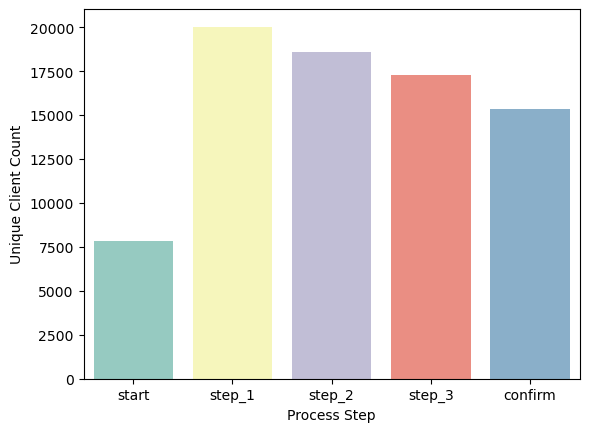

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_control = df_control.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_c = unique_clients_per_step_control.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_c.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que 'start' esté al final
order = [ 'start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_c['Process Step'] = pd.Categorical(unique_clients_per_step_c['Process Step'], categories=order, ordered=True)
unique_clients_per_step_c = unique_clients_per_step_c.sort_values('Process Step')

# Crear el gráfico de barras
sns.barplot(data=unique_clients_per_step_c, x='Process Step', y='Unique Client Count', palette="Set3")

# Mostrar el gráfico
plt.show()


In [212]:
unique_clients_per_step_c

,Process Step,Unique Client Count
1,start,7855
2,step_1,20029
3,step_2,18586
4,step_3,17295
0,confirm,15331


- Aqui podemos ver el numero total de veces q los clientes han estado en esos pasos. 

# Conversion Rate TEST

# Drop Rate TEST

- ### Drop rate TEST de todas las visitas incluyendo usuarios q han vuelto a pasos anteriores


  Process Step  Unique Client Count  Drop Rate
1        start                11012        NaN
2       step_1                24132   0.082090
3       step_2                22151   0.066995
4       step_3                20667   0.104950


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/654172094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step_t, x='Process Step', y='Drop Rate', palette="Set3")


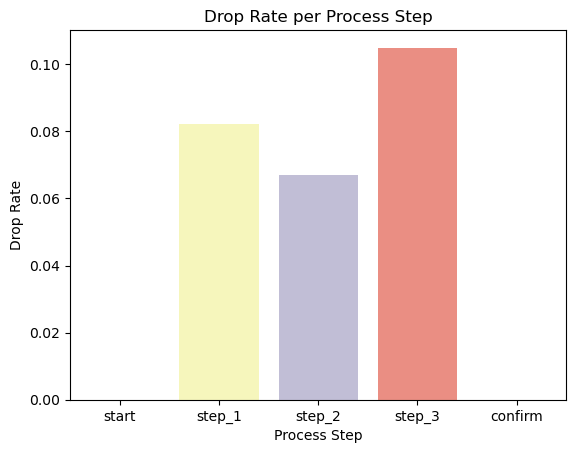

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_test = df_test.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_t = unique_clients_per_step_test.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_t.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que los pasos estén en el orden correcto, sin incluir 'start'
order = ['start','step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_t = unique_clients_per_step_t[unique_clients_per_step_t['Process Step'].isin(order)]
unique_clients_per_step_t['Process Step'] = pd.Categorical(unique_clients_per_step_t['Process Step'], categories=order, ordered=True)
unique_clients_per_step_t = unique_clients_per_step_t.sort_values('Process Step')

# Añadir una columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_t['Next Unique Client Count'] = unique_clients_per_step_t['Unique Client Count'].shift(-1)

# Calcular el drop rate correctamente
unique_clients_per_step_t['Drop Rate'] = (unique_clients_per_step_t['Unique Client Count'] - unique_clients_per_step_t['Next Unique Client Count']) / unique_clients_per_step_t['Unique Client Count']

# Eliminar la última fila que tendrá un NaN en 'Next Unique Client Count' y 'Drop Rate'
unique_clients_per_step_t = unique_clients_per_step_t[:-1]

# Eliminar la columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_t = unique_clients_per_step_t.drop(columns=['Next Unique Client Count'])

unique_clients_per_step_t.at[unique_clients_per_step_t[unique_clients_per_step_t['Process Step'] == 'start'].index[0], 'Drop Rate'] = np.nan

# Imprimir los valores intermedios
print(unique_clients_per_step_t)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step_t, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Drop Rate per Process Step')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


# Clientes q regresan TEST

In [214]:
import pandas as pd

# Obtener listas de clientes únicos por paso
clients_per_step = df_test.groupby('Process Step')['Client ID'].apply(list).to_dict()

# Inicializar un diccionario para almacenar los resultados
clients_returning_t1 = {'From Step': [], 'To Step': [], 'Clients Returning': []}

# Definir el orden de los pasos
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Calcular clientes que regresan a pasos anteriores
for i in range(1, len(steps)):
    current_step = steps[i]
    previous_step = steps[i-1]
    
    current_clients = set(clients_per_step.get(current_step, []))
    previous_clients = set(clients_per_step.get(previous_step, []))
    
    # Contar clientes que están en el paso actual y también en el paso anterior
    returning_clients = len(previous_clients & current_clients)
    
    # Almacenar los resultados
    clients_returning_t1['From Step'].append(current_step)
    clients_returning_t1['To Step'].append(previous_step)
    clients_returning_t1['Clients Returning'].append(returning_clients)

# Convertir resultados a DataFrame
clients_returning_df = pd.DataFrame(clients_returning_t1)

# Mostrar resultados
clients_returning_df


,From Step,To Step,Clients Returning
0,step_1,start,9897
1,step_2,step_1,22015
2,step_3,step_2,20551
3,confirm,step_3,18191


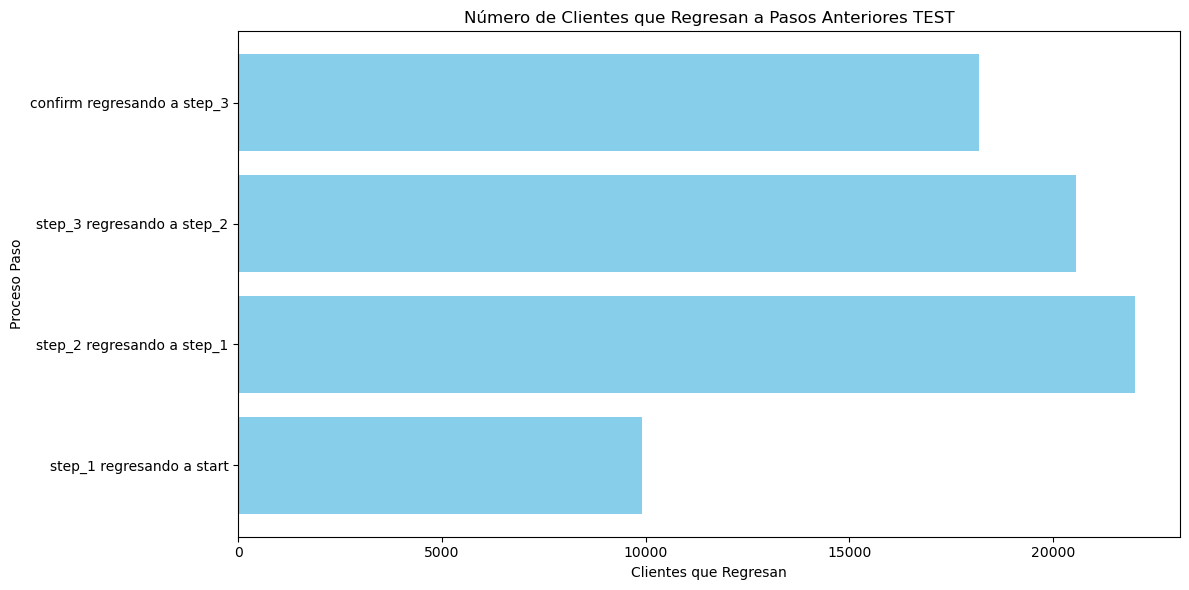

In [215]:
import matplotlib.pyplot as plt

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
plt.barh(clients_returning_df['From Step'] + ' regresando a ' + clients_returning_df['To Step'], 
         clients_returning_df['Clients Returning'], color='skyblue')

# Etiquetas y título
plt.xlabel('Clientes que Regresan')
plt.ylabel('Proceso Paso')
plt.title('Número de Clientes que Regresan a Pasos Anteriores TEST')
plt.tight_layout()

# Mostrar gráfico
plt.show()


- Nº de clientes q regresan al paso anterior

# Control
- Nº de clientes q aparecen en un paso y aparecen en otro.  

In [216]:
# Verificar duplicados
duplicated_clients_c = df_control[df_control.duplicated(['Client ID', 'Process Step'], keep=False)]

# Mostrar duplicados
print("Duplicated Clients:")
duplicated_clients_c

# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_control_d = duplicated_clients_c.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_c_d = unique_clients_per_step_control_d.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_c_d.columns = ['Process Step', 'Unique Client Count']
unique_clients_per_step_c_d

Duplicated Clients:


,Process Step,Unique Client Count
0,confirm,748
1,start,3229
2,step_1,5702
3,step_2,4626
4,step_3,3524


In [217]:
# Verificar duplicados en 'start'
duplicated_clients_c_start = df_control[(df_control['Process Step'] == 'start') & df_control.duplicated(['Client ID', 'Process Step'], keep=False)]

print("Duplicated Clients in 'start':")
duplicated_clients_c_start

# Contar los clientes únicos duplicados en 'start'
unique_clients_per_step_control_d_start = duplicated_clients_c_start['Client ID'].nunique()

# Mostrar el resultado
unique_clients_per_step_control_d_start


Duplicated Clients in 'start':


3229

# Test

  Process Step  Unique Client Count  Drop Rate
1        start                 5504        NaN
2       step_1                 8349   0.400407
3       step_2                 5006   0.374551
4       step_3                 3131   0.205046


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/3838908613.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step_t, x='Process Step', y='Drop Rate', palette="Set3")


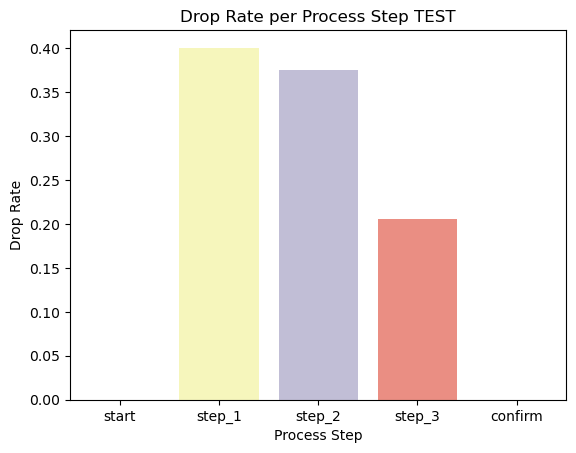

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_test = duplicated_clients_t.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_t = unique_clients_per_step_test.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_t.columns = ['Process Step', 'Unique Client Count']

# Ordenar el DataFrame para que los pasos estén en el orden correcto, sin incluir 'start'
order = ['start','step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_t = unique_clients_per_step_t[unique_clients_per_step_t['Process Step'].isin(order)]
unique_clients_per_step_t['Process Step'] = pd.Categorical(unique_clients_per_step_t['Process Step'], categories=order, ordered=True)
unique_clients_per_step_t = unique_clients_per_step_t.sort_values('Process Step')

# Añadir una columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_t['Next Unique Client Count'] = unique_clients_per_step_t['Unique Client Count'].shift(-1)

# Calcular el drop rate correctamente
unique_clients_per_step_t['Drop Rate'] = (unique_clients_per_step_t['Unique Client Count'] - unique_clients_per_step_t['Next Unique Client Count']) / unique_clients_per_step_t['Unique Client Count']

# Eliminar la última fila que tendrá un NaN en 'Next Unique Client Count' y 'Drop Rate'
unique_clients_per_step_t = unique_clients_per_step_t[:-1]

# Eliminar la columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_t = unique_clients_per_step_t.drop(columns=['Next Unique Client Count'])

unique_clients_per_step_t.at[unique_clients_per_step_t[unique_clients_per_step_t['Process Step'] == 'start'].index[0], 'Drop Rate'] = np.nan

# Imprimir los valores intermedios
print(unique_clients_per_step_t)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step_t, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Drop Rate per Process Step TEST')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


# DROP RATE TEST
- Este código calcula y visualiza la tasa de abandono de clientes únicos en cada paso del proceso, ayudándote a identificar en qué pasos se pierden más clientes.

# Drop Rate CONTROL

- Drop rate de todas las visitas, incluyendo clientes q han vuelto a pasos anteriores

  Process Step  Unique Duplicated Client Count  Drop Rate
1        start                            7855        NaN
2       step_1                           20029   0.072046
3       step_2                           18586   0.069461
4       step_3                           17295   0.113559


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/4276239329.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step_c, x='Process Step', y='Drop Rate', palette="Set3")


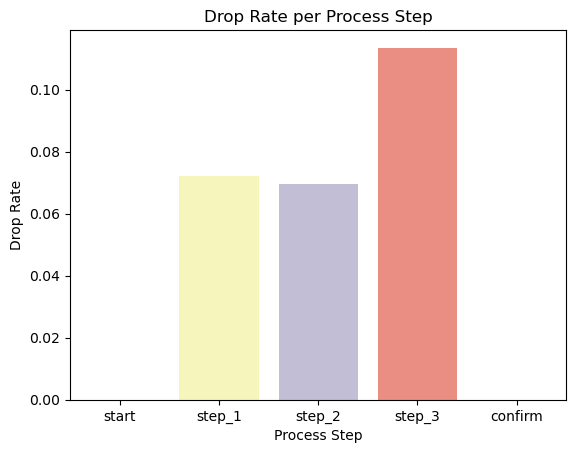

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_control = df_control.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_c = unique_clients_per_step_control.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_c.columns = ['Process Step', 'Unique Duplicated Client Count']

# Ordenar el DataFrame para que los pasos estén en el orden correcto, sin incluir 'start'
order = ['start','step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_c = unique_clients_per_step_c[unique_clients_per_step_c['Process Step'].isin(order)]
unique_clients_per_step_c['Process Step'] = pd.Categorical(unique_clients_per_step_c['Process Step'], categories=order, ordered=True)
unique_clients_per_step_c = unique_clients_per_step_c.sort_values('Process Step')

# Añadir una columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_c['Next Unique Duplicated Client Count'] = unique_clients_per_step_c['Unique Duplicated Client Count'].shift(-1)

# Calcular el drop rate correctamente
unique_clients_per_step_c['Drop Rate'] = (unique_clients_per_step_c['Unique Duplicated Client Count'] - unique_clients_per_step_c['Next Unique Duplicated Client Count']) / unique_clients_per_step_c['Unique Duplicated Client Count']

# Eliminar la última fila que tendrá un NaN en 'Next Unique Client Count' y 'Drop Rate'
unique_clients_per_step_c = unique_clients_per_step_c[:-1]

# Eliminar la columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_c = unique_clients_per_step_c.drop(columns=['Next Unique Duplicated Client Count'])

unique_clients_per_step_c.at[unique_clients_per_step_c[unique_clients_per_step_c['Process Step'] == 'start'].index[0], 'Drop Rate'] = np.nan

# Imprimir los valores intermedios
print(unique_clients_per_step_c)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step_c, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Drop Rate per Process Step')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


In [220]:
unique_clients_per_step_c

,Process Step,Unique Duplicated Client Count,Drop Rate
1,start,7855,NaN
2,step_1,20029,0.072046
3,step_2,18586,0.069461
4,step_3,17295,0.113559


## Clientes que regresan CONTROL

In [221]:
import pandas as pd

# Obtener listas de clientes únicos por paso
clients_per_step = df_control.groupby('Process Step')['Client ID'].apply(list).to_dict()

# Inicializar un diccionario para almacenar los resultados
clients_returning_c1 = {'From Step': [], 'To Step': [], 'Clients Returning': []}

# Definir el orden de los pasos
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Calcular clientes que regresan a pasos anteriores
for i in range(1, len(steps)):
    current_step = steps[i]
    previous_step = steps[i-1]
    
    current_clients = set(clients_per_step.get(current_step, []))
    previous_clients = set(clients_per_step.get(previous_step, []))
    
    # Contar clientes que están en el paso actual y también en el paso anterior
    returning_clients = len(previous_clients & current_clients)
    
    # Almacenar los resultados
    clients_returning_c1['From Step'].append(current_step)
    clients_returning_c1['To Step'].append(previous_step)
    clients_returning_c1['Clients Returning'].append(returning_clients)

# Convertir resultados a DataFrame
clients_returning_df_c = pd.DataFrame(clients_returning_c1)

# Mostrar resultados
clients_returning_df_c


,From Step,To Step,Clients Returning
0,step_1,start,6721
1,step_2,step_1,18460
2,step_3,step_2,17196
3,confirm,step_3,15167


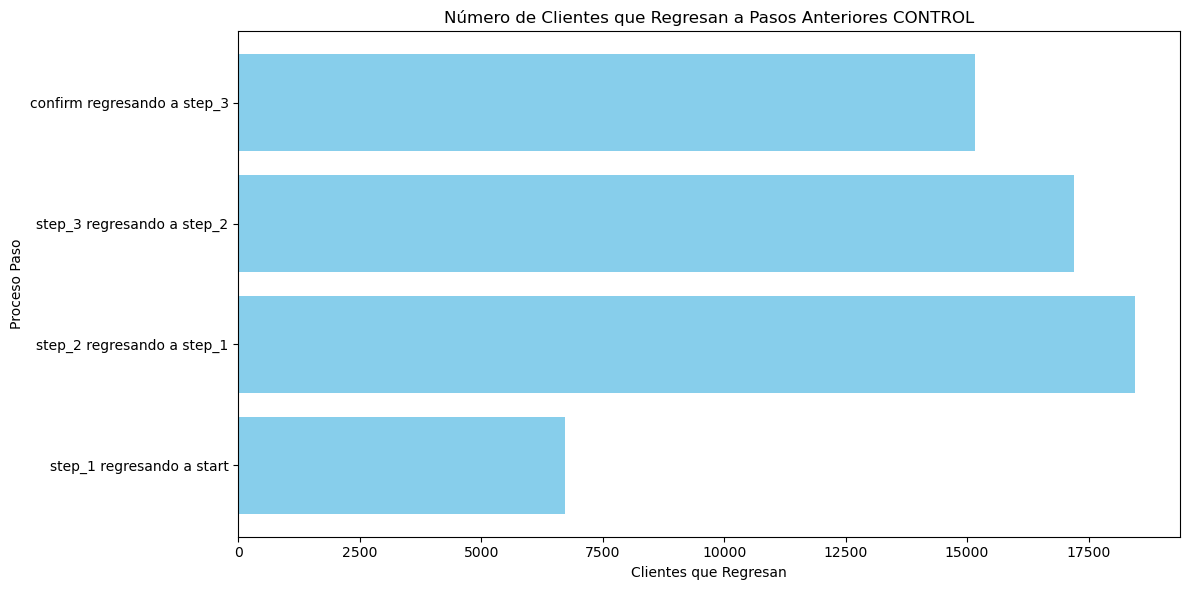

In [222]:
import matplotlib.pyplot as plt

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
plt.barh(clients_returning_df_c['From Step'] + ' regresando a ' + clients_returning_df_c['To Step'], 
         clients_returning_df_c['Clients Returning'], color='skyblue')

# Etiquetas y título
plt.xlabel('Clientes que Regresan')
plt.ylabel('Proceso Paso')
plt.title('Número de Clientes que Regresan a Pasos Anteriores CONTROL')
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Nº de clientes q regresan al paso anterior desde el paso en el q estan

# Calculo visitas unicas control

In [223]:

# Verificar duplicados
duplicated_clients = df_control[df_control.duplicated(['Client ID', 'Process Step'], keep=False)]

# Mostrar duplicados
print("Duplicated Clients:")
duplicated_clients



Duplicated Clients:


,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
11,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08,18:52:17,0 days 00:00:49,Control
12,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08,18:53:20,0 days 00:01:03,Control
13,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08,18:53:29,0 days 00:00:09,Control
15,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08,18:59:55,0 days 00:01:51,Control
16,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,2017-04-08,19:00:15,0 days 00:00:20,Control
...,...,...,...,...,...,...,...,...,...
251847,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:04:17,2017-05-09,16:04:17,0 days 00:01:22,Control
251848,9997470,395791369_55562604618,761490147_96352537762_21814,start,2017-05-09 16:38:32,2017-05-09,16:38:32,0 days 00:34:15,Control
251849,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:38:34,2017-05-09,16:38:34,0 days 00:00:02,Control
251850,9997470,395791369_55562604618,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,2017-05-09,16:38:37,0 days 00:00:03,Control


In [224]:
# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_control_d = duplicated_clients.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_c_d = unique_clients_per_step_control_d.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_c_d.columns = ['Process Step', 'Unique Client Count']

In [225]:
unique_clients_per_step_c_d

,Process Step,Unique Client Count
0,confirm,748
1,start,3229
2,step_1,5702
3,step_2,4626
4,step_3,3524


In [226]:
duplicated_clients

,Client ID,Visitor ID,Visit ID,Process Step,Date/Time,Date,Time,Time Diff,Variation
11,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08,18:52:17,0 days 00:00:49,Control
12,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08,18:53:20,0 days 00:01:03,Control
13,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08,18:53:29,0 days 00:00:09,Control
15,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08,18:59:55,0 days 00:01:51,Control
16,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,2017-04-08,19:00:15,0 days 00:00:20,Control
...,...,...,...,...,...,...,...,...,...
251847,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:04:17,2017-05-09,16:04:17,0 days 00:01:22,Control
251848,9997470,395791369_55562604618,761490147_96352537762_21814,start,2017-05-09 16:38:32,2017-05-09,16:38:32,0 days 00:34:15,Control
251849,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:38:34,2017-05-09,16:38:34,0 days 00:00:02,Control
251850,9997470,395791369_55562604618,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,2017-05-09,16:38:37,0 days 00:00:03,Control


- ### Drop rate de todas las visitas unicas CONTROL

  Process Step  Unique Client Count  Drop Rate
1        start                 3229        NaN
2       step_1                 5702   0.188706
3       step_2                 4626   0.238219
4       step_3                 3524   0.787741


/var/folders/zc/6rc7nzhj13scy5qssxw2pjlh0000gn/T/ipykernel_56727/1014597730.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_clients_per_step_c_d, x='Process Step', y='Drop Rate', palette="Set3")


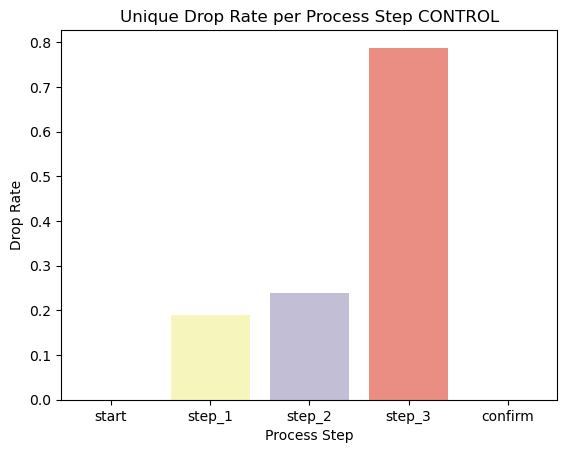

In [227]:
# Supongamos que 'df_control' es tu DataFrame original

# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
unique_clients_per_step_control_d = duplicated_clients.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_c_d = unique_clients_per_step_control_d.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_c_d.columns = ['Process Step', 'Unique Client Count']
# Ordenar el DataFrame para que los pasos estén en el orden correcto, sin incluir 'start'
order = ['start','step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_c_d = unique_clients_per_step_c_d[unique_clients_per_step_c_d['Process Step'].isin(order)]
unique_clients_per_step_c_d['Process Step'] = pd.Categorical(unique_clients_per_step_c_d['Process Step'], categories=order, ordered=True)
unique_clients_per_step_c_d = unique_clients_per_step_c_d.sort_values('Process Step')

# Añadir una columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_c_d['Next Unique Client Count'] = unique_clients_per_step_c_d['Unique Client Count'].shift(-1)

# Calcular el drop rate correctamente
unique_clients_per_step_c_d['Drop Rate'] = (unique_clients_per_step_c_d['Unique Client Count'] - unique_clients_per_step_c_d['Next Unique Client Count']) / unique_clients_per_step_c_d['Unique Client Count']

# Eliminar la última fila que tendrá un NaN en 'Next Unique Client Count' y 'Drop Rate'
unique_clients_per_step_c_d = unique_clients_per_step_c_d[:-1]

# Eliminar la columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_c_d = unique_clients_per_step_c_d.drop(columns=['Next Unique Client Count'])

unique_clients_per_step_c_d.at[unique_clients_per_step_c_d[unique_clients_per_step_c_d['Process Step'] == 'start'].index[0], 'Drop Rate'] = np.nan

# Imprimir los valores intermedios
print(unique_clients_per_step_c_d)

# Crear el gráfico de barras para el drop rate
sns.barplot(data=unique_clients_per_step_c_d, x='Process Step', y='Drop Rate', palette="Set3")

# Mostrar el gráfico
plt.title('Unique Drop Rate per Process Step CONTROL')
plt.ylabel('Drop Rate')
plt.xlabel('Process Step')
plt.show()


# Analisis #

- Hay 5508 clientes en el df_test
- Hay 4626 clientes en el df_control

In [228]:
import pandas as pd

# Supongamos que df es tu DataFrame original con todos los registros de clientes
# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
total_clients_per_step = df_test.groupby('Process Step')['Client ID'].nunique().reset_index()
total_clients_per_step.columns = ['Process Step', 'Total Clients']

# Unir el DataFrame de clientes que regresan con el total de clientes
clients_returning_df_c = clients_returning_df_c.merge(total_clients_per_step, left_on='From Step', right_on='Process Step')

# Calcular el porcentaje de error
clients_returning_df_c['Error Percentage'] = (clients_returning_df_c['Clients Returning'] / clients_returning_df_c['Total Clients']) * 100

# Seleccionar columnas relevantes para el resultado final
error_percentage_df = clients_returning_df_c[['From Step', 'To Step', 'Clients Returning', 'Total Clients', 'Error Percentage']]

# Mostrar el resultado
print(error_percentage_df)


  From Step To Step  Clients Returning  Total Clients  Error Percentage
0    step_1   start               6721          24132         27.850986
1    step_2  step_1              18460          22151         83.337095
2    step_3  step_2              17196          20667         83.205110
3   confirm  step_3              15167          18498         81.992648


- Aproximadamente el 27.85% de los clientes en step_1 regresaron al paso start.

- Aproximadamente el 83.34% de los clientes en step_2 regresaron al paso step_1. Este es un alto porcentaje, indicando que una gran parte de los clientes retrocedió a step_1

- Aproximadamente el 83.21% de los clientes en step_3 regresaron al paso step_2. Similar al caso anterior, esto indica un alto porcentaje de retrocesos en esta transición.

- Aproximadamente el 81.99% de los clientes en confirm regresaron al paso step_3. Este porcentaje es también alto, mostrando que una cantidad significativa de clientes volvió a step_3.

Altos Porcentajes de Error: Los porcentajes de error en las transiciones de step_2 a step_1, step_3 a step_2, y confirm a step_3 son bastante altos (alrededor del 80-83%). Esto sugiere que en estos puntos del proceso hay una alta tasa de retrocesos o revisiones.

Área de Mejora: Los altos porcentajes de error en estas transiciones podrían indicar problemas en el proceso. Los clientes que regresan a pasos anteriores pueden estar encontrando dificultades en avanzar al siguiente paso, lo cual puede ser un área que necesite revisión o mejora en el proceso.

Proceso step_1 a start: Aunque el porcentaje de error en esta transición es menor (27.85%), aún muestra que algunos clientes están regresando al inicio del proceso desde step_1. Esto puede ser una señal de que hay clientes que vuelven a revisar información desde el principio.

In [229]:
clients_returning_df

,From Step,To Step,Clients Returning
0,step_1,start,9897
1,step_2,step_1,22015
2,step_3,step_2,20551
3,confirm,step_3,18191


In [230]:
import pandas as pd

# Supongamos que df es tu DataFrame original con todos los registros de clientes
# Agrupar por 'Process Step' y contar los valores únicos de 'Client ID'
total_clients_per_step = df_control.groupby('Process Step')['Client ID'].nunique().reset_index()
total_clients_per_step.columns = ['Process Step', 'Total Clients']

# Unir el DataFrame de clientes que regresan con el total de clientes
clients_returning_df = clients_returning_df.merge(total_clients_per_step, left_on='From Step', right_on='Process Step')

# Calcular el porcentaje de error
clients_returning_df['Error Percentage'] = (clients_returning_df['Clients Returning'] / clients_returning_df['Total Clients']) * 100

# Seleccionar columnas relevantes para el resultado final
error_percentage_df = clients_returning_df[['From Step', 'To Step', 'Clients Returning', 'Total Clients', 'Error Percentage']]

# Mostrar el resultado
error_percentage_df

,From Step,To Step,Clients Returning,Total Clients,Error Percentage
0,step_1,start,9897,20029,49.413351
1,step_2,step_1,22015,18586,118.449370
2,step_3,step_2,20551,17295,118.826250
3,confirm,step_3,18191,15331,118.655013


In [231]:
import pandas as pd

# Agrupar por 'Process Step' y contar los clientes únicos
unique_clients_per_step = df_control.groupby('Process Step')['Client ID'].nunique()

# Convertir la serie a un DataFrame y restablecer el índice
unique_clients_per_step_df = unique_clients_per_step.reset_index()

# Renombrar las columnas para mayor claridad
unique_clients_per_step_df.columns = ['Process Step', 'Unique Client Count']

# Definir el orden de los pasos
order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
unique_clients_per_step_df['Process Step'] = pd.Categorical(unique_clients_per_step_df['Process Step'], categories=order, ordered=True)
unique_clients_per_step_df = unique_clients_per_step_df.sort_values('Process Step')

# Añadir una columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_df['Next Unique Client Count'] = unique_clients_per_step_df['Unique Client Count'].shift(-1)

# Calcular el porcentaje de clientes únicos que regresan correctamente
unique_clients_per_step_df['Drop Rate'] = (unique_clients_per_step_df['Unique Client Count'] - unique_clients_per_step_df['Next Unique Client Count']) / unique_clients_per_step_df['Unique Client Count']

# Eliminar la última fila que tendrá un NaN en 'Next Unique Client Count' y 'Drop Rate'
unique_clients_per_step_df = unique_clients_per_step_df[:-1]

# Eliminar la columna auxiliar 'Next Unique Client Count'
unique_clients_per_step_df = unique_clients_per_step_df.drop(columns=['Next Unique Client Count'])

# Manejar el caso del primer paso
unique_clients_per_step_df.at[unique_clients_per_step_df[unique_clients_per_step_df['Process Step'] == 'start'].index[0], 'Drop Rate'] = np.nan

# Mostrar el resultado
print(unique_clients_per_step_df)


  Process Step  Unique Client Count  Drop Rate
1        start                 7855        NaN
2       step_1                20029   0.072046
3       step_2                18586   0.069461
4       step_3                17295   0.113559


Aproximadamente el 49.41% de los clientes en step_1 regresaron al paso start. Este porcentaje indica que casi la mitad de los clientes en step_1 volvieron a empezar el proceso.-